In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.layers import RandomBrightness, RandomContrast, RandomFlip, RandomTranslation, RandomRotation, RandomZoom

In [2]:
def parse_image(filename):
    image = tf.io.read_file(filename)
    image = tf.io.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [128, 128])
    
    return image

In [3]:
img = parse_image('AoSTHRobotnik.jpg')

In [6]:
brightness_examples = [RandomBrightness(1.0, value_range=(0,1))(img) for _ in range(10)]
contrast_examples = [RandomContrast(1.0)(img) for _ in range(10)]
flip_examples = [RandomFlip()(img) for _ in range(10)]
translation_examples = [RandomTranslation(0.5, 0.5, fill_mode='constant', fill_value=1)(img) for _ in range(10)]
rotation_examples = [RandomRotation(0.5, fill_mode='constant', fill_value=1)(img) for _ in range(10)]
zoom_examples = [RandomZoom(0.5, 0.5, fill_mode='constant', fill_value=1)(img) for _ in range(10)]

examples = [brightness_examples, contrast_examples, flip_examples, translation_examples, rotation_examples, zoom_examples]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


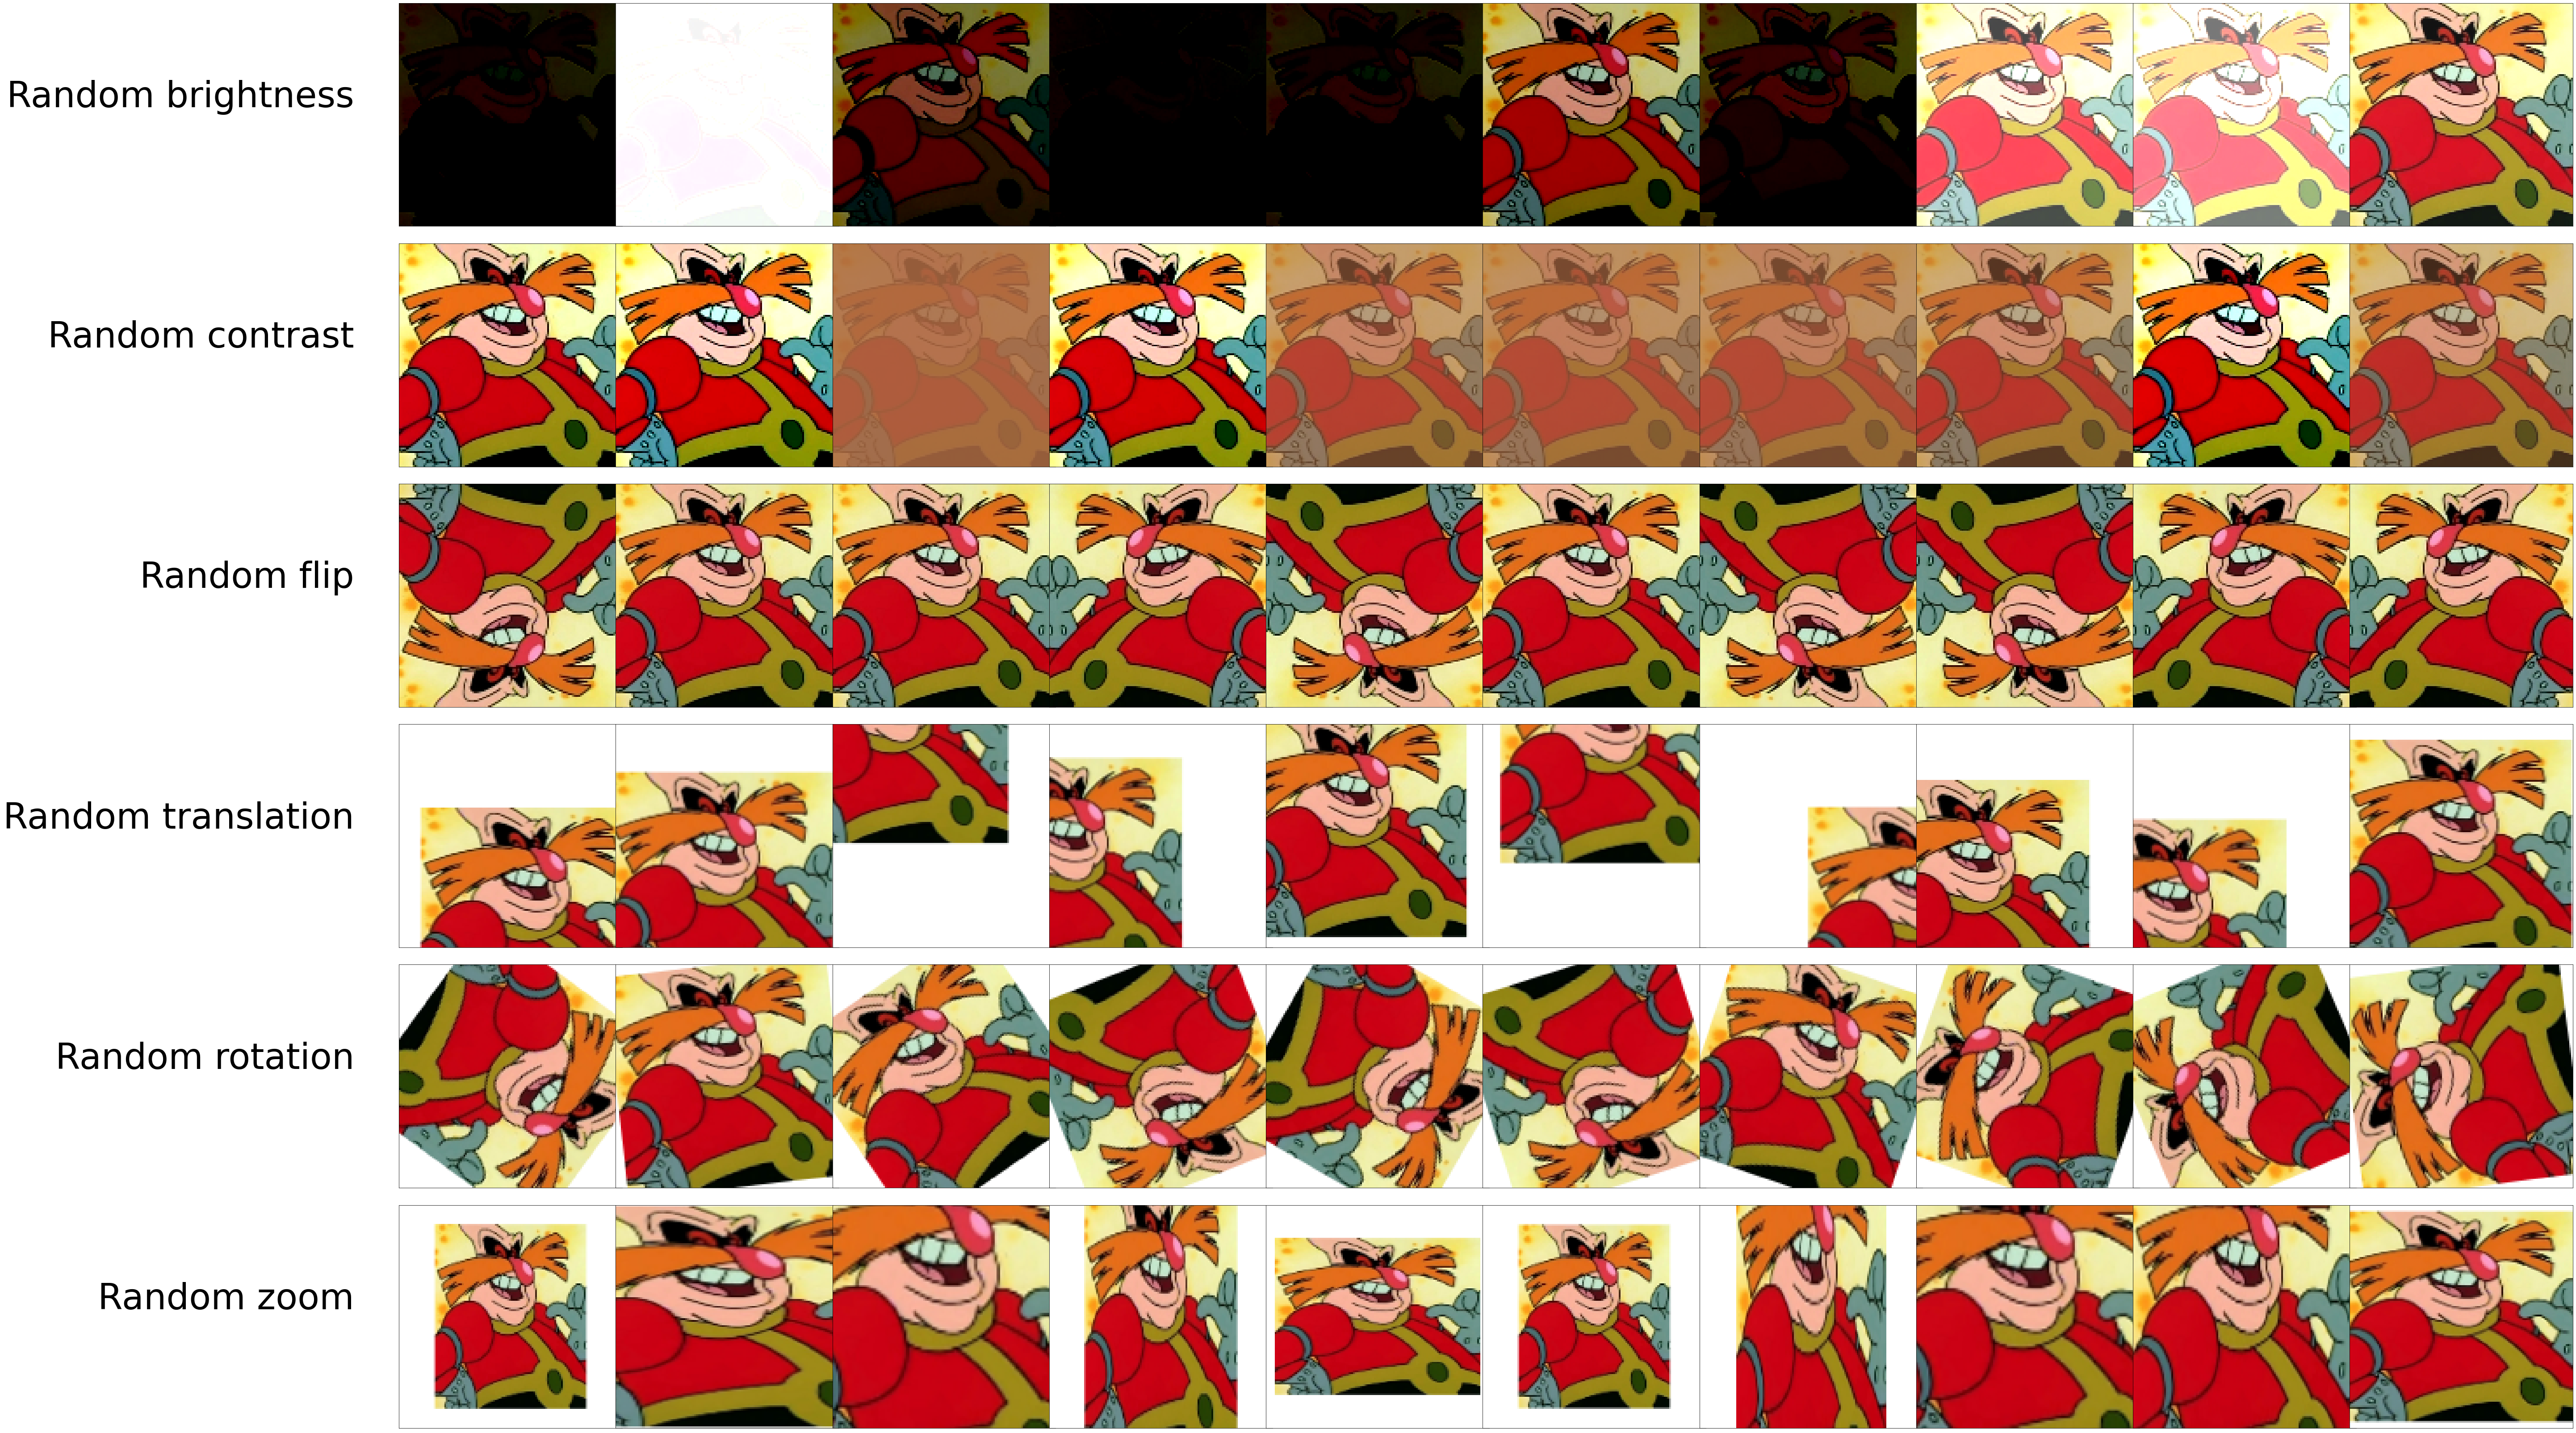

In [7]:
row_titles = ['Random brightness', 'Random contrast', 'Random flip', 'Random translation', 'Random rotation', 'Random zoom']

fig, axes = plt.subplots(6,10, figsize=(80,45))

for i, example in enumerate(examples):
    for j in range(10):
        axes[i,j].imshow(examples[i][j])
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])
        
for ax, row in zip(axes[:,0], row_titles):
    ax.set_ylabel(row, rotation=0, labelpad=100, size=80, ha='right')

plt.tight_layout()
plt.savefig('augmentation_examples.pdf')